<a href="https://colab.research.google.com/github/rohandawar/CarBrandClassificationinDeep-Learning/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link for how to copy kaggle data into google colab:
https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

another link:

https://pub.towardsai.net/car-brand-classification-in-deep-learning-with-python-d08c54add941

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

In [3]:
#check the present working directory
!pwd

/content


In [4]:
#change to the directory where the file is present
%cd /content/gdrive/My Drive/Kaggle
!pwd

/content/gdrive/My Drive/Kaggle
/content/gdrive/My Drive/Kaggle


In [5]:
#copy and paste the API command from kaggle to collab notebook
!kaggle datasets download -d ritesh2000/car-brand-images-dataset

  0% 0.00/1.06M [00:00<?, ?B/s]
100% 1.06M/1.06M [00:00<00:00, 34.9MB/s]


In [6]:
#Check the content of the diectory
!ls

car-brand-images-dataset.zip  kaggle.json  Test  Train


In [7]:
#unzip the data and remove the ZIP file
!unzip \*.zip && rm *.zip

Archive:  car-brand-images-dataset.zip
replace Test/audi/21.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [8]:
# Importing the important Libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [9]:
#resizing all the images to 224, 224
IMAGE_SIZE = [224, 224]

train_path = 'Train'
test_path = 'Test'

In [10]:
# Use imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',
                  include_top = False)

94773248/94765736 [==============================] - 1s 0us/step


In [11]:
#don't train existing weights

for layer in resnet.layers:
  layer.trainable = False

#no of output classes
folders = glob('Train/*')

#our Layers
x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

#creating object model

model = Model(inputs= resnet.input, outputs= prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
#compile the model

model.compile(loss='categorical_crossentropy', optimizer= 'adam', 
              metrics = ['accuracy'])


#Using the Image Data Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Train', 
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

r = model.fit_generator(training_set, validation_data=test_set,
                        epochs = 50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set))

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 35s 26s/step - loss: 4.1456 - accuracy: 0.3125 - val_loss: 21.0538 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 21s 15s/step - loss: 11.5860 - accuracy: 0.3281 - val_loss: 13.8394 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 21s 15s/step - loss: 9.8227 - accuracy: 0.3906 - val_loss: 5.0761 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 20s 14s/step - loss: 4.9377 - accuracy: 0.3750 - val_loss: 5.1608 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 21s 15s/step - loss: 5.6487 - accuracy: 0.3438 - val_loss: 4.4491 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 4.3627 - accuracy: 0.3594 - val_loss: 4.5201 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 2.2925 - accuracy: 0.4844 - val_loss: 2.8063 - val_accuracy: 0.3276
Epoch 8/50
2/2 [========

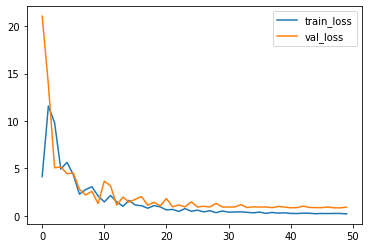

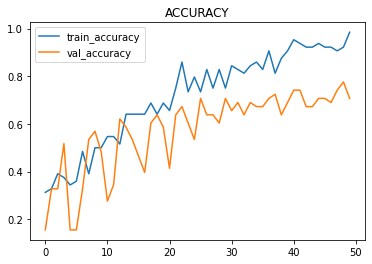

In [14]:
#plotting the loss

plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.title('LOSS')

#Plotting the accuracy

plt.plot(r.history['accuracy'], label = 'train_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('ACCURACY')
plt.show()

In [15]:
#saving the model
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [16]:
y_pred = model.predict(test_set)
y_pred

array([[3.10732629e-02, 7.91071415e-01, 1.77855402e-01],
       [1.60891846e-01, 7.84913957e-01, 5.41941449e-02],
       [4.55596205e-03, 3.68308514e-01, 6.27135575e-01],
       [2.02417132e-02, 1.01276627e-02, 9.69630599e-01],
       [6.13458315e-03, 2.78122025e-03, 9.91084218e-01],
       [1.64849926e-02, 2.22945631e-01, 7.60569394e-01],
       [2.90593365e-03, 2.29133993e-01, 7.67960012e-01],
       [3.20939254e-03, 9.41053867e-01, 5.57366945e-02],
       [3.14156972e-02, 1.27171278e-02, 9.55867171e-01],
       [2.56988555e-02, 3.78267646e-01, 5.96033454e-01],
       [7.56590292e-02, 2.30474636e-01, 6.93866313e-01],
       [1.85707305e-02, 6.10784739e-02, 9.20350790e-01],
       [3.16036455e-02, 3.77509356e-01, 5.90887010e-01],
       [9.77897923e-03, 1.34705678e-01, 8.55515361e-01],
       [8.99498522e-01, 3.75047252e-02, 6.29967451e-02],
       [8.32997113e-02, 6.58756137e-01, 2.57944077e-01],
       [3.46638035e-06, 1.93480213e-04, 9.99803126e-01],
       [2.09547505e-01, 6.81161

In [17]:
y_pred = np.argmax(y_pred, axis =1)
y_pred

array([1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2])

In [19]:
#Now we will test the model on any random image from test data.

#load the model
model = load_model('model_resnet50.h5')

In [20]:
!ls

kaggle.json  model_resnet50.h5	Test  Train


In [23]:
img = image.load_img('Test/lamborghini/11.jpg', target_size=(224,224))

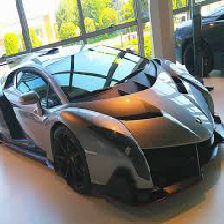

In [24]:
img

In [25]:
x = image.img_to_array(img)

In [26]:
#print the shape of image
x.shape

(224, 224, 3)

In [27]:
#normalizing the image pixels values
x = x/255

#expand the Dimensions
x = np.expand_dims(x, axis =0)
img_data= preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
#prediction
model.predict(img_data)

array([[0.01120562, 0.05339478, 0.93539953]], dtype=float32)

In [29]:
a = np.argmax(model.predict(img_data), axis=1)
a

array([2])